In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.multicomp import MultiComparison

In [2]:
df = pd.read_excel('C:/Users/Administrador/OneDrive\Ambiente de Trabalho/Article_Organize_Data/Clean_Single_Data.xlsx')
df

,No Amostra,Data de colheita,Zona de Produção,Espécie,Cd (mg/kg),Hg (mg/kg),Pb (mg/kg),E.coli (NMP/100G),Day,Month,Year
0,362/21,13/04/2021,ETJ,Pé-de-burro,0.24,0.028,0.24,NaN,13,Apr,2021
1,363/21,13/04/2021,ESD1,Ostra-portuguesa,0.50,0.026,0.12,NaN,13,Apr,2021
2,366/21,13/04/2021,RIAV4,Ostra-japonesa,0.18,0.045,0.14,NaN,13,Apr,2021
3,369/21,19/04/2021,LOB,Amêijoa-relógio,0.09,0.011,0.70,NaN,19,Apr,2021
4,376/21,20/04/2021,L7c2,Amêijoa-boa,0.06,0.030,0.02,NaN,20,Apr,2021
...,...,...,...,...,...,...,...,...,...,...,...
1812,1044/22,28/09/2022,RIAV1,Longueirão,0.13,0.016,0.14,20.0,28,Sept,2022
1813,1045/22,28/09/2022,RIAV1,Berbigão,0.16,0.030,0.10,20.0,28,Sept,2022
1814,1046/22,28/09/2022,RIAV1,Amêijoa-japonesa,0.26,0.017,0.06,NaN,28,Sept,2022
1815,1047/22,28/09/2022,L1,Mexilhão,0.28,0.012,0.18,NaN,28,Sept,2022


# Quick EDA

In [3]:
df['Zona de Produção'].value_counts()

ETJ      214
ESD1     128
LOB      120
EMR      101
ESD2      87
RIAV3     66
RIAV4     65
RIAV2     61
RIAV1     60
L6        53
L5        52
L2        51
OLH2      47
EMN       44
OLH5      41
LAG       40
FAR2      40
FUZ       39
OLH4      38
L7c2      36
TAV       36
L8        36
ELM       35
FAR1      33
L3        32
POR2      31
OLH1      29
L1        27
L4        25
L9        22
LAL       20
L7c1      19
OLH3      18
L7a       15
L7b       14
VT        14
GUA       12
POR3       9
ZNV        4
EMI        3
Name: Zona de Produção, dtype: int64

# ANOVA

* Is there difference in mean?
* Let´s analyse close areas

## [Pb] in RIAV

In [4]:
riav = df[df['Zona de Produção'].str.contains('RIAV')]
riav['Zona de Produção'].value_counts()

RIAV3    66
RIAV4    65
RIAV2    61
RIAV1    60
Name: Zona de Produção, dtype: int64

<AxesSubplot:xlabel='Zona de Produção', ylabel='Pb (mg/kg)'>

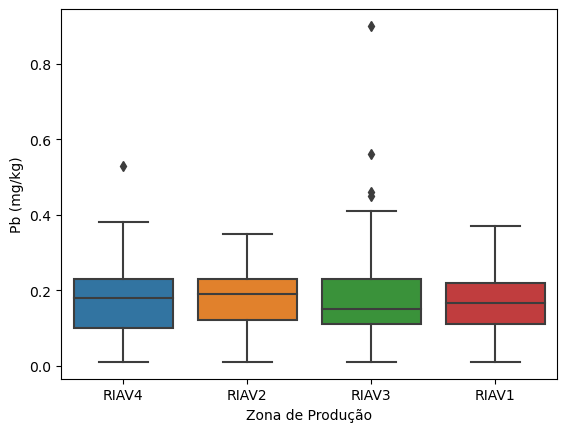

In [5]:
sns.boxplot(riav['Zona de Produção'],riav['Pb (mg/kg)'])

In [6]:
riav.groupby('Zona de Produção').agg(N_samples=('Zona de Produção','count'),
                                    Pb_mean=('Pb (mg/kg)','mean'))

,N_samples,Pb_mean
Zona de Produção,,
RIAV1,60,0.168500
RIAV2,61,0.173279
RIAV3,66,0.183939
RIAV4,65,0.176154


### ANOVA Assumptions

__Normality__

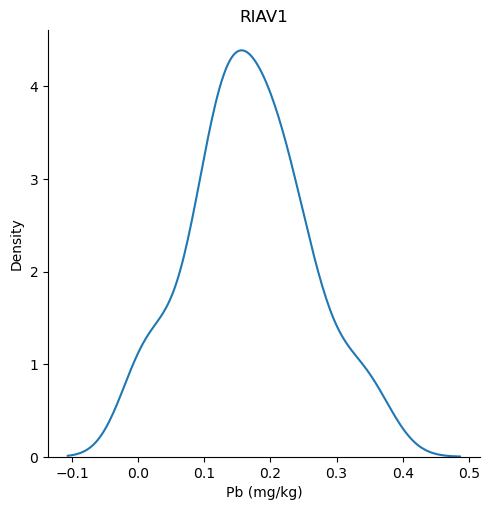

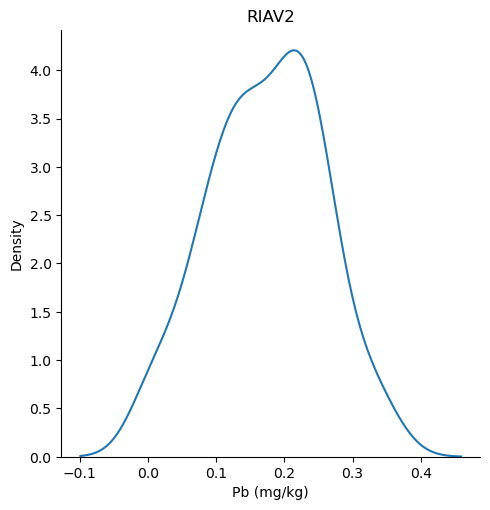

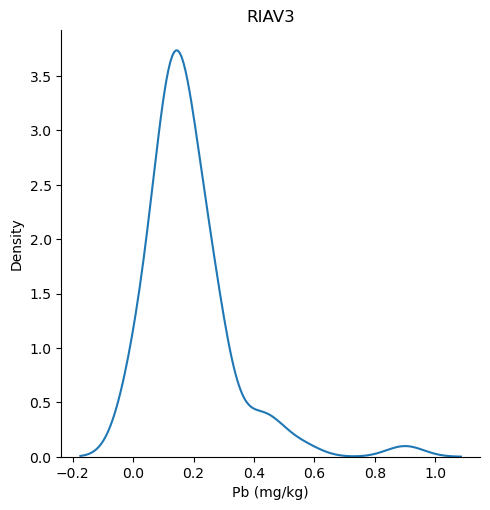

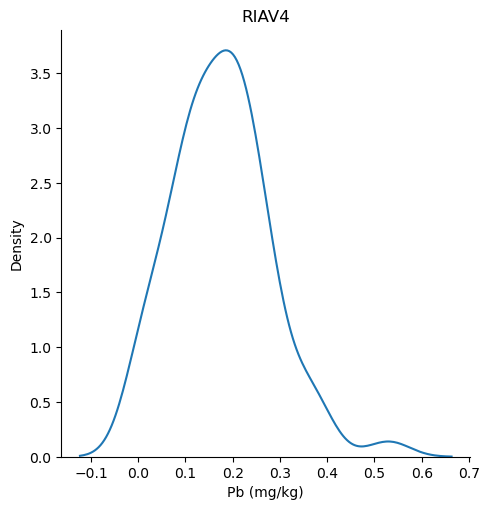

In [7]:
# Histogram
for areas, areas_data in riav.groupby('Zona de Produção'):
    sns.displot(areas_data['Pb (mg/kg)'],kind='kde')
    plt.title(areas)

In [8]:
# Shapiro-Wilk Test
def shapiro_test(group_data):
    stat, p_value = stats.shapiro(group_data)
    alpha = 0.05
    print(f"Shapiro-Wilk Test for Normality - p-value: {p_value}")
    if p_value > alpha:
        print("Data is normally distributed (fail to reject H0)")
    else:
        print("Data is not normally distributed (reject H0)")

In [9]:
groups = riav.groupby('Zona de Produção')['Pb (mg/kg)']

for group_name, group_data in groups:
    print(f"Group: {group_name}")
    shapiro_test(group_data)

Group: RIAV1
Shapiro-Wilk Test for Normality - p-value: 0.25195035338401794
Data is normally distributed (fail to reject H0)
Group: RIAV2
Shapiro-Wilk Test for Normality - p-value: 0.3580852150917053
Data is normally distributed (fail to reject H0)
Group: RIAV3
Shapiro-Wilk Test for Normality - p-value: 2.748834226906638e-08
Data is not normally distributed (reject H0)
Group: RIAV4
Shapiro-Wilk Test for Normality - p-value: 0.04517628625035286
Data is not normally distributed (reject H0)


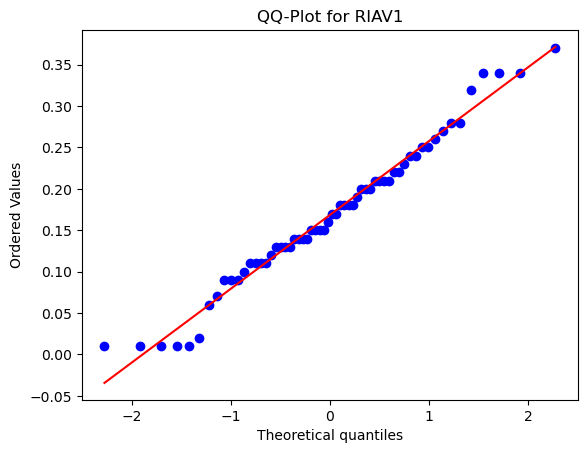

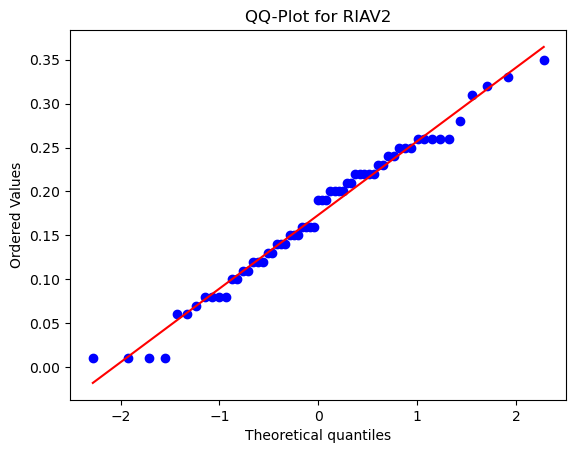

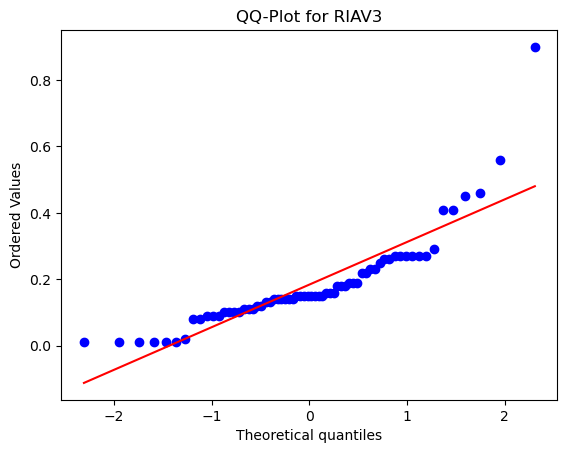

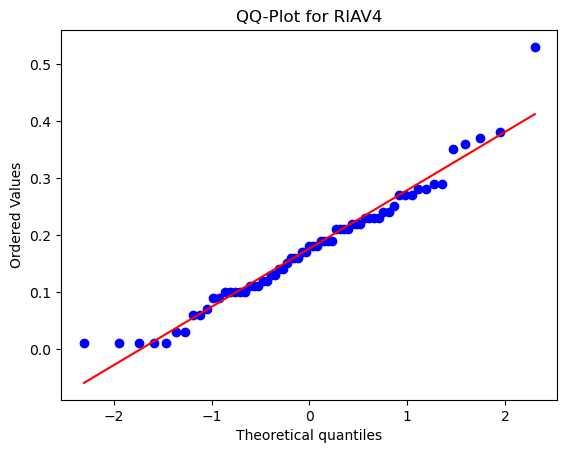

In [10]:
# QQ-plot 
for area, areas_data in riav.groupby('Zona de Produção'):
    stats.probplot(areas_data['Pb (mg/kg)'], dist='norm',plot=plt,fit=True)
    plt.title(f'QQ-Plot for {area}')
    plt.show()

__Homogeneity of Variance__

In [11]:
# Levene Test
stat, p_value = stats.levene(*[group_data for _, group_data in groups])
alpha = 0.05
print(f"Levene's Test for Homogeneity of Variance - p-value: {p_value}")
if p_value > alpha:
    print("Homogeneity of Variance is met (fail to reject H0)")
else:
    print("Homogeneity of Variance is not met (reject H0)")

Levene's Test for Homogeneity of Variance - p-value: 0.4563823556573462
Homogeneity of Variance is met (fail to reject H0)


__Perform One-Way Anova__

In [12]:
model = smf.ols('Q("Pb (mg/kg)") ~ Q("Zona de Produção")', data=riav).fit()
result = sm.stats.anova_lm(model)
print(result)

                          df    sum_sq   mean_sq        F    PR(>F)
Q("Zona de Produção")    3.0  0.007962  0.002654  0.23042  0.875157
Residual               248.0  2.856423  0.011518      NaN       NaN


__Visualize the Residuals__

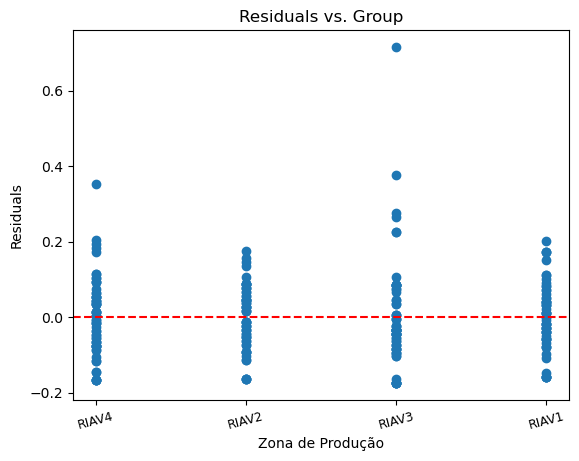

In [13]:
# Visualize Residuals
residuals = model.resid
plt.scatter(riav['Zona de Produção'], residuals)
plt.xlabel('Zona de Produção')
plt.xticks(fontsize=9,rotation=15)
plt.ylabel('Residuals')
plt.title('Residuals vs. Group')
plt.axhline(0, color='red', linestyle='--')
plt.show()

Conclusions: By the One-Way Anova it is possible to see that all the RIAV areas doesn´t have significant diferences in the [pb] mean. So we can group all the RAIV areas into a single 'RIAV' area.

## [Pb] OLH

In [14]:
olh = df[df['Zona de Produção'].str.contains('OLH')]
olh['Zona de Produção'].value_counts()

OLH2    47
OLH5    41
OLH4    38
OLH1    29
OLH3    18
Name: Zona de Produção, dtype: int64

<AxesSubplot:xlabel='Zona de Produção', ylabel='Pb (mg/kg)'>

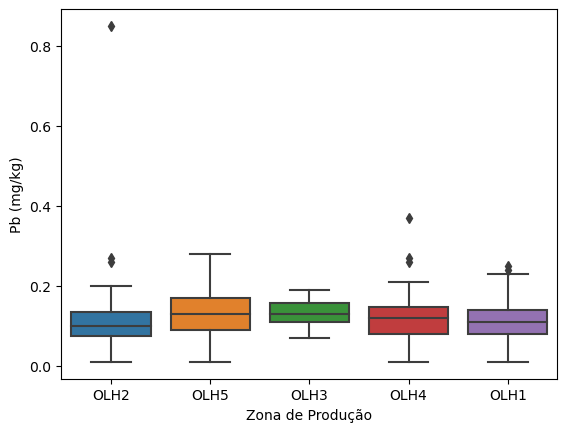

In [15]:
sns.boxplot(olh['Zona de Produção'],olh['Pb (mg/kg)'])

In [16]:
olh.groupby('Zona de Produção').agg(N_Samples=('Zona de Produção','count'),
                                   Pb_mean=('Pb (mg/kg)','mean'))

,N_Samples,Pb_mean
Zona de Produção,,
OLH1,29,0.122069
OLH2,47,0.121702
OLH3,18,0.131667
OLH4,38,0.121842
OLH5,41,0.133171


### ANOVA Assumptions

__Normality__

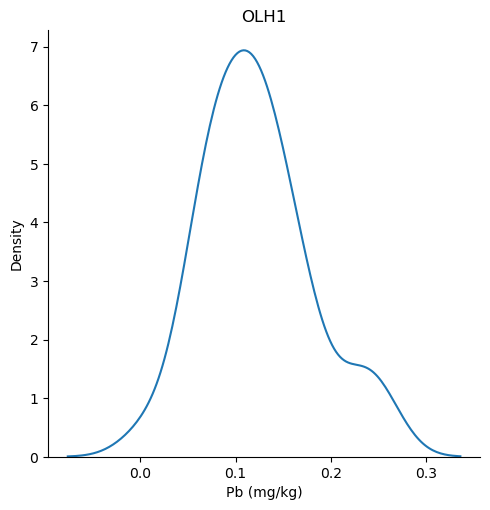

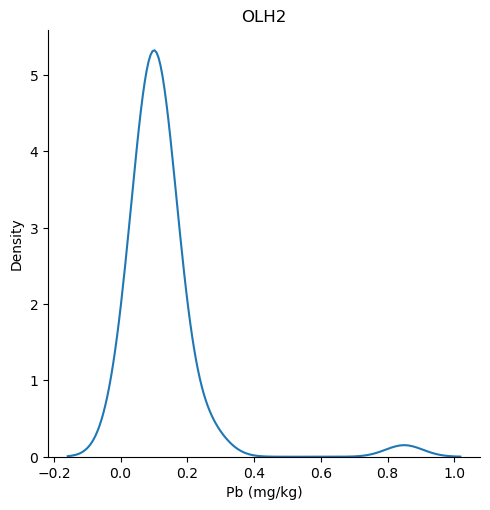

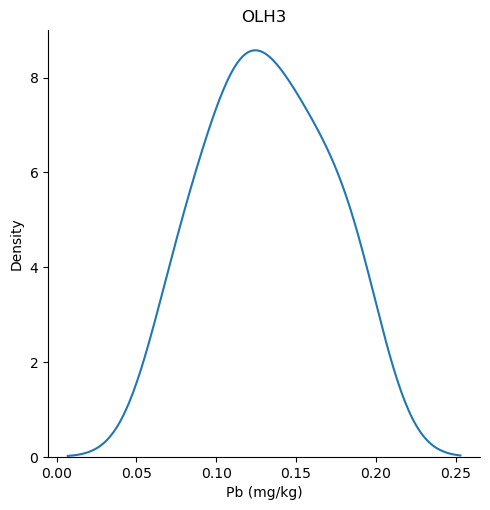

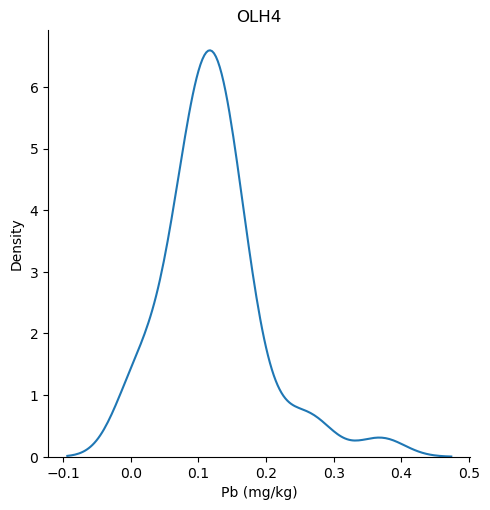

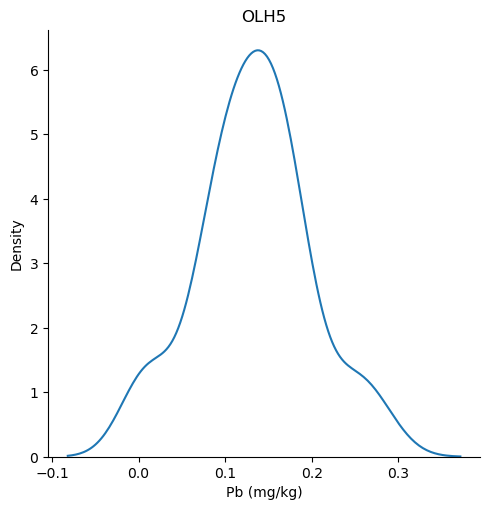

In [17]:
# Histogram
for areas, areas_data in olh.groupby('Zona de Produção'):
    sns.displot(areas_data['Pb (mg/kg)'],kind='kde')
    plt.title(areas)

In [18]:
# Shapiro-Wilk Test
groups = olh.groupby('Zona de Produção')['Pb (mg/kg)']

for group_name, group_data in groups:
    print(f"Group: {group_name}")
    shapiro_test(group_data)

Group: OLH1
Shapiro-Wilk Test for Normality - p-value: 0.17579025030136108
Data is normally distributed (fail to reject H0)
Group: OLH2
Shapiro-Wilk Test for Normality - p-value: 3.1093353586308936e-11
Data is not normally distributed (reject H0)
Group: OLH3
Shapiro-Wilk Test for Normality - p-value: 0.5688962936401367
Data is normally distributed (fail to reject H0)
Group: OLH4
Shapiro-Wilk Test for Normality - p-value: 0.001881763688288629
Data is not normally distributed (reject H0)
Group: OLH5
Shapiro-Wilk Test for Normality - p-value: 0.16169948875904083
Data is normally distributed (fail to reject H0)


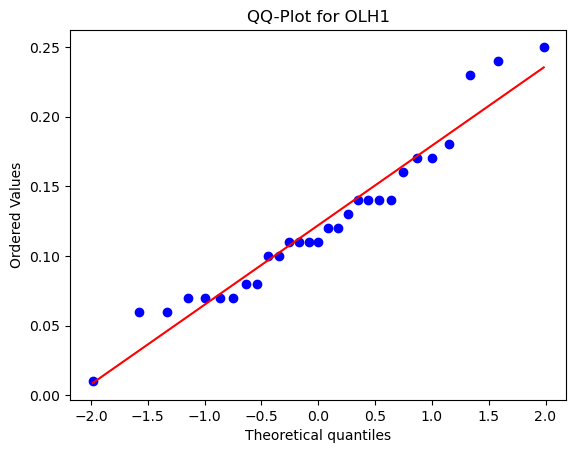

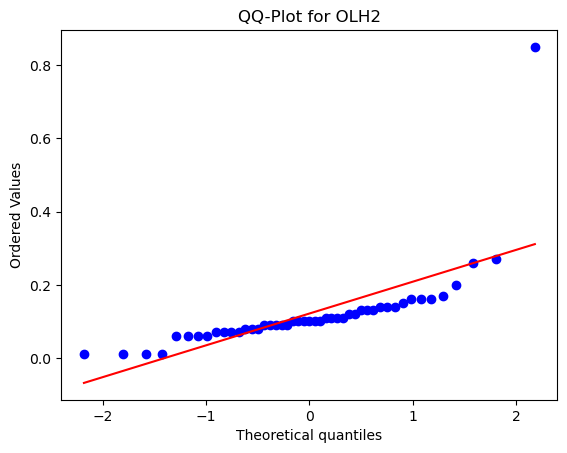

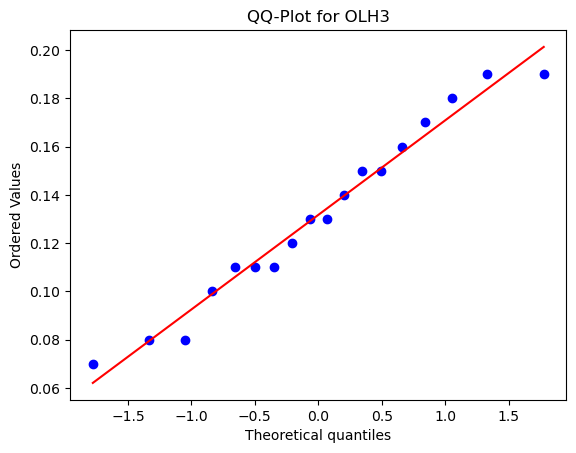

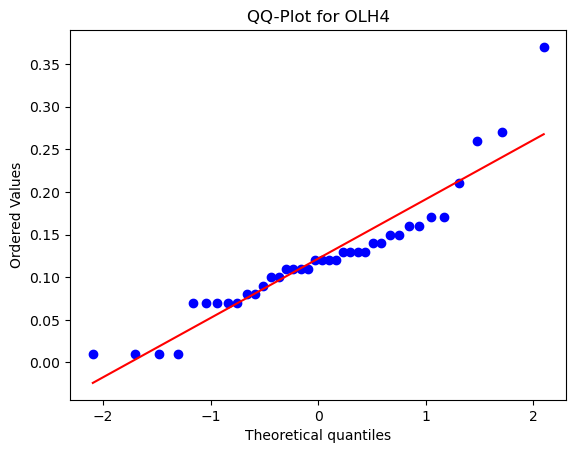

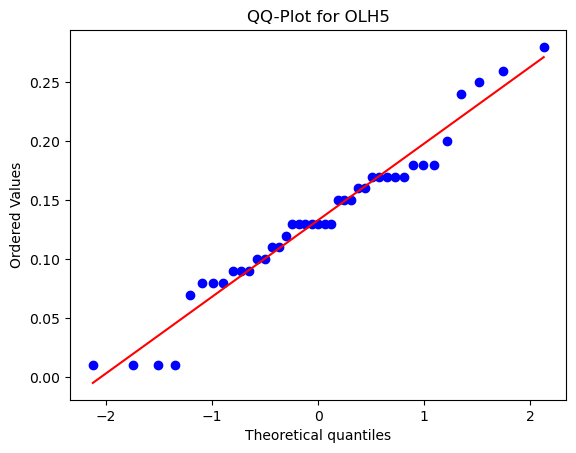

In [19]:
# QQ-plot 
for area, areas_data in olh.groupby('Zona de Produção'):
    stats.probplot(areas_data['Pb (mg/kg)'], dist='norm',plot=plt,fit=True)
    plt.title(f'QQ-Plot for {area}')
    plt.show()

__Homogeneity of Variance__

In [20]:
# Levene Test
stat, p_value = stats.levene(*[group_data for _, group_data in groups])
alpha = 0.05
print(f"Levene's Test for Homogeneity of Variance - p-value: {p_value}")
if p_value > alpha:
    print("Homogeneity of Variance is met (fail to reject H0)")
else:
    print("Homogeneity of Variance is not met (reject H0)")

Levene's Test for Homogeneity of Variance - p-value: 0.8022283944680375
Homogeneity of Variance is met (fail to reject H0)


__Perform One-Way Anova__

In [21]:
model = smf.ols('Q("Pb (mg/kg)") ~ Q("Zona de Produção")', data=olh).fit()
result = sm.stats.anova_lm(model)
print(result)

                          df    sum_sq   mean_sq         F    PR(>F)
Q("Zona de Produção")    4.0  0.004624  0.001156  0.169825  0.953536
Residual               168.0  1.143649  0.006807       NaN       NaN


__Visualize The Residuals__

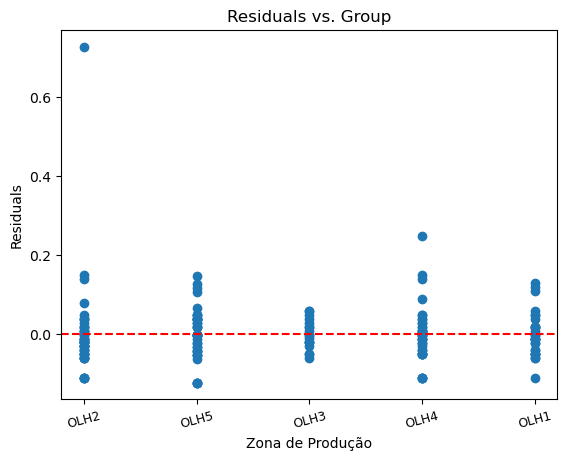

In [22]:
# Visualize Residuals
residuals = model.resid
plt.scatter(olh['Zona de Produção'], residuals)
plt.xlabel('Zona de Produção')
plt.xticks(fontsize=9,rotation=15)
plt.ylabel('Residuals')
plt.title('Residuals vs. Group')
plt.axhline(0, color='red', linestyle='--')
plt.show()

Conclusions: By the One-Way Anova it is possible to see that all the OLH areas doesn´t have significant diferences in the [pb] mean. So we can group all the OLH areas into a single 'RIAV' area.

## [pb] ESD

In [65]:
esd = df[df['Zona de Produção'].str.contains('ESD')]
esd['Zona de Produção'].value_counts()

ESD1    128
ESD2     87
Name: Zona de Produção, dtype: int64

<AxesSubplot:xlabel='Zona de Produção', ylabel='Pb (mg/kg)'>

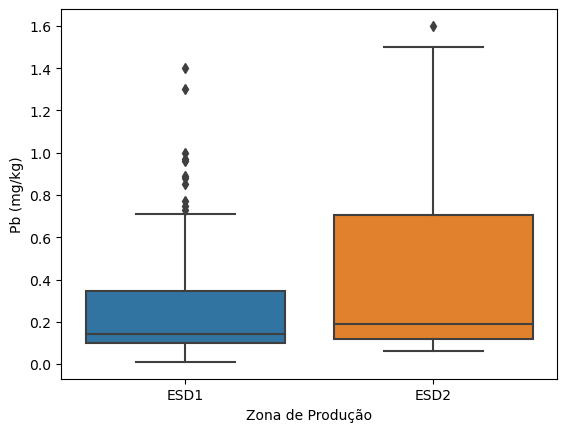

In [66]:
sns.boxplot(esd['Zona de Produção'],esd['Pb (mg/kg)'])

In [67]:
esd.groupby('Zona de Produção').agg(N_Samples=('Zona de Produção','count'),
                                  Pb_mean=('Pb (mg/kg)','mean'))

,N_Samples,Pb_mean
Zona de Produção,,
ESD1,128,0.263594
ESD2,87,0.414828


__Normality__

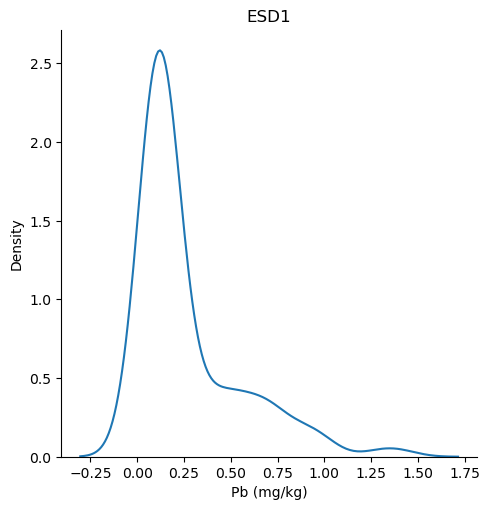

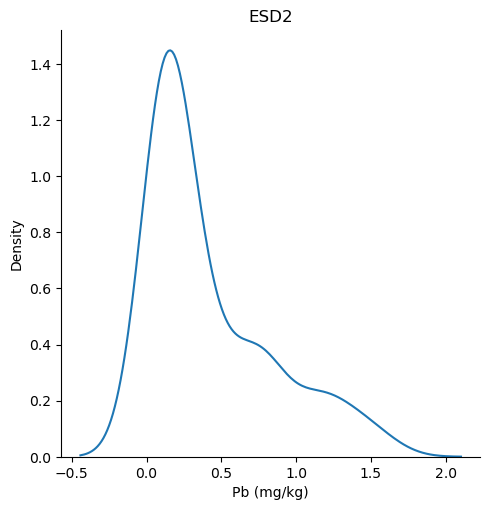

In [24]:
# Histogram
for areas, areas_data in esd.groupby('Zona de Produção'):
    sns.displot(areas_data['Pb (mg/kg)'],kind='kde')
    plt.title(areas)

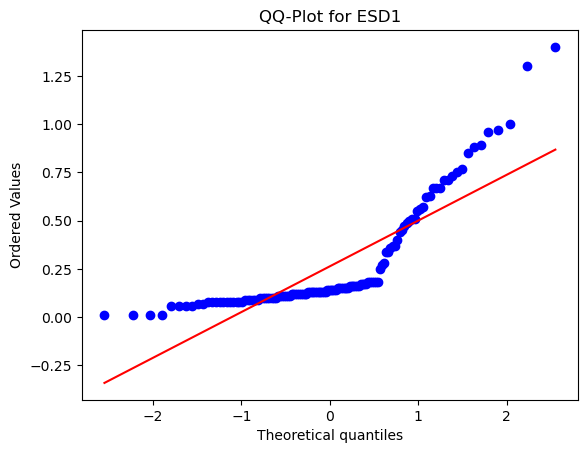

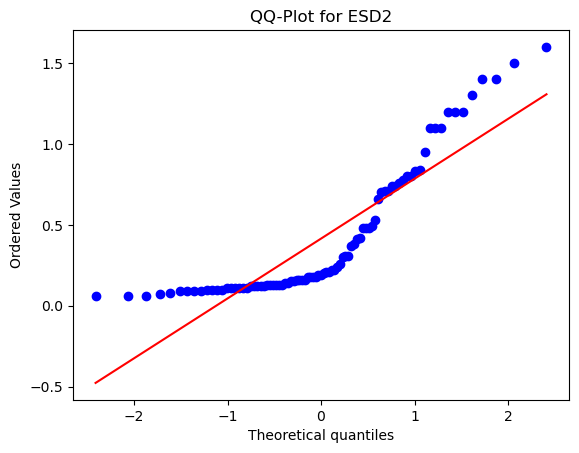

In [25]:
# QQ-plot 
for area, areas_data in esd.groupby('Zona de Produção'):
    stats.probplot(areas_data['Pb (mg/kg)'], dist='norm',plot=plt,fit=True)
    plt.title(f'QQ-Plot for {area}')
    plt.show()

In [26]:
# Shapiro-Wilk Test
groups = esd.groupby('Zona de Produção')['Pb (mg/kg)']

for group_name, group_data in groups:
    print(f"Group: {group_name}")
    shapiro_test(group_data)

Group: ESD1
Shapiro-Wilk Test for Normality - p-value: 2.921163880448621e-14
Data is not normally distributed (reject H0)
Group: ESD2
Shapiro-Wilk Test for Normality - p-value: 6.677877695260293e-10
Data is not normally distributed (reject H0)


Let´s try to apply a log transformation

In [27]:
esd['Pb_log'] = np.log(esd['Pb (mg/kg)'])
esd

,No Amostra,Data de colheita,Zona de Produção,Espécie,Cd (mg/kg),Hg (mg/kg),Pb (mg/kg),E.coli (NMP/100G),Day,Month,Year,Pb_log
1,363/21,13/04/2021,ESD1,Ostra-portuguesa,0.50,0.026,0.12,NaN,13,Apr,2021,-2.120264
39,128/22,22/02/2022,ESD1,Lambujinha,0.05,0.025,0.62,NaN,22,Feb,2022,-0.478036
40,131/22,22/02/2022,ESD2,Amêijoa-boa,0.24,0.024,0.14,NaN,22,Feb,2022,-1.966113
41,132/22,22/02/2022,ESD2,Amêijoa-japonesa,0.28,0.030,0.12,NaN,22,Feb,2022,-2.120264
42,133/22,22/02/2022,ESD2,Longueirão,0.06,0.019,0.18,NaN,22,Feb,2022,-1.714798
...,...,...,...,...,...,...,...,...,...,...,...,...
1701,795/21,13/09/2021,ESD1,Ostra-plana,0.70,0.014,0.10,NaN,13,Sept,2021,-2.302585
1760,931/22,12/09/2022,ESD2,Amêijoa-boa,0.13,0.021,0.08,130.0,12,Sept,2022,-2.525729
1761,932/22,12/09/2022,ESD1,Ostra-portuguesa,0.80,0.019,0.14,2400.0,12,Sept,2022,-1.966113
1789,994/22,19/09/2022,ESD2,Amêijoa-japonesa,0.12,0.026,0.18,170.0,19,Sept,2022,-1.714798


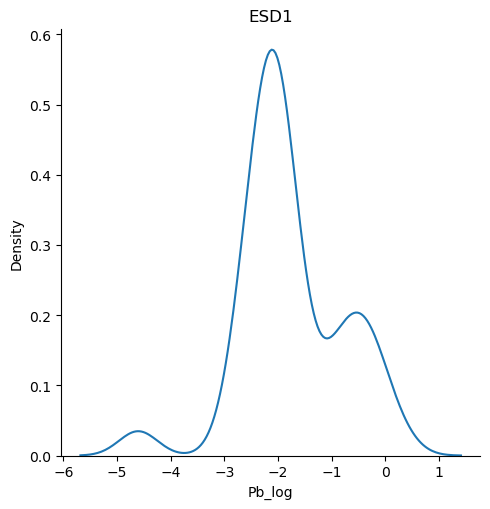

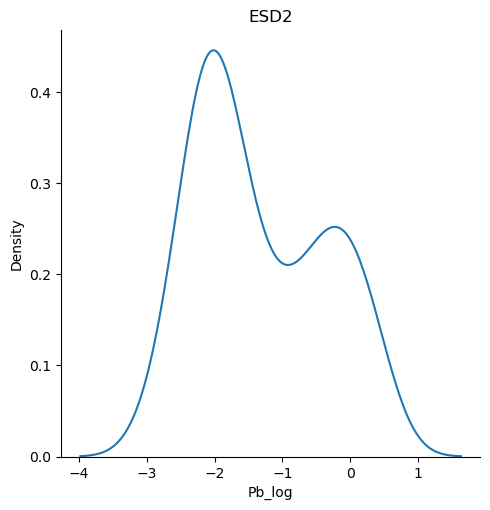

In [28]:
# Histogram
for areas, areas_data in esd.groupby('Zona de Produção'):
    sns.displot(areas_data['Pb_log'],kind='kde')
    plt.title(areas)

In [29]:
# Shapiro-Wilk Test
groups = esd.groupby('Zona de Produção')['Pb_log']

for group_name, group_data in groups:
    print(f"Group: {group_name}")
    shapiro_test(group_data)

Group: ESD1
Shapiro-Wilk Test for Normality - p-value: 2.894807948905509e-07
Data is not normally distributed (reject H0)
Group: ESD2
Shapiro-Wilk Test for Normality - p-value: 4.799899397767149e-05
Data is not normally distributed (reject H0)


It´s close to a normal distribution but it doesn´t follow yet

__Homogeneity of Variance__

In [30]:
# Levene Test
stat, p_value = stats.levene(*[group_data for _, group_data in groups])
alpha = 0.05
print(f"Levene's Test for Homogeneity of Variance - p-value: {p_value}")
if p_value > alpha:
    print("Homogeneity of Variance is met (fail to reject H0)")
else:
    print("Homogeneity of Variance is not met (reject H0)")

Levene's Test for Homogeneity of Variance - p-value: 0.15887489668939347
Homogeneity of Variance is met (fail to reject H0)


__Note:__ It is necessary to perform a non-paremetric test for the ESD area

## [Pb] FAR

In [60]:
far = df[df['Zona de Produção'].str.contains('FAR')]
far['Zona de Produção'].value_counts()

FAR2    40
FAR1    33
Name: Zona de Produção, dtype: int64

<AxesSubplot:xlabel='Zona de Produção', ylabel='Pb (mg/kg)'>

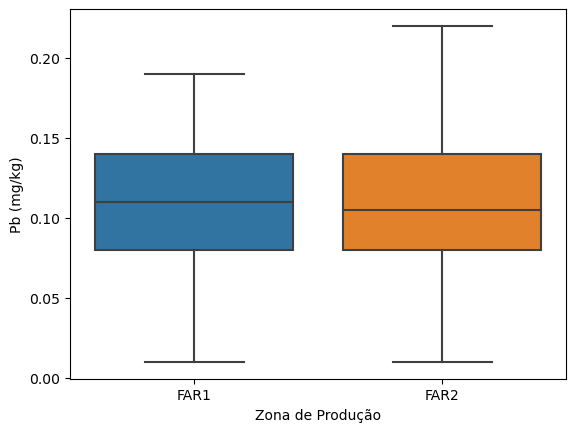

In [61]:
sns.boxplot(far['Zona de Produção'],far['Pb (mg/kg)'])

In [58]:
far.groupby('Zona de Produção').agg(N_Samples=('Zona de Produção','count'),
                                  Pb_mean=('Pb (mg/kg)','mean'))

,N_Samples,Pb_mean
Zona de Produção,,
FAR1,33,0.108485
FAR2,40,0.110000


__Normality__

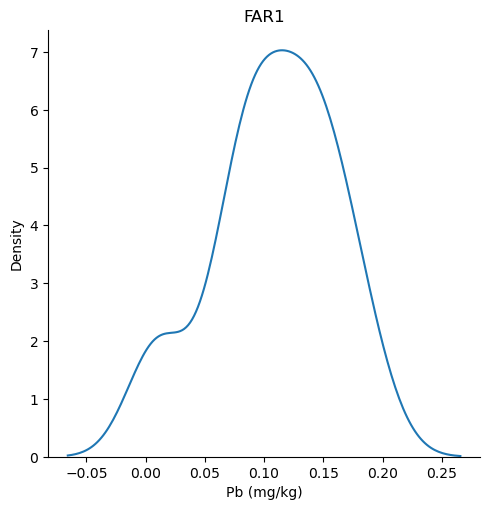

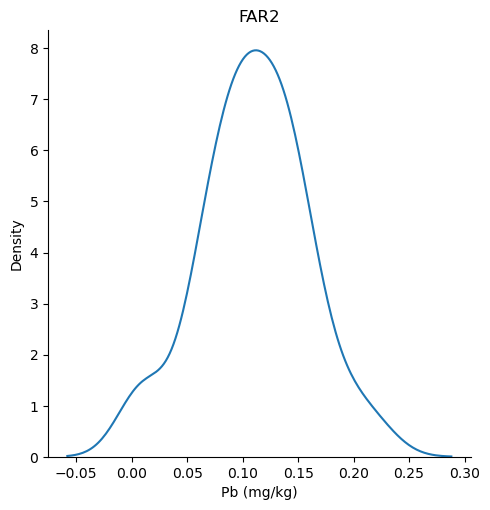

In [32]:
for areas, areas_data in far.groupby('Zona de Produção'):
    sns.displot(areas_data['Pb (mg/kg)'],kind='kde')
    plt.title(areas)

In [33]:
# Shapiro-Wilk Test
groups = far.groupby('Zona de Produção')['Pb (mg/kg)']

for group_name, group_data in groups:
    print(f"Group: {group_name}")
    shapiro_test(group_data)

Group: FAR1
Shapiro-Wilk Test for Normality - p-value: 0.07299700379371643
Data is normally distributed (fail to reject H0)
Group: FAR2
Shapiro-Wilk Test for Normality - p-value: 0.5030903220176697
Data is normally distributed (fail to reject H0)


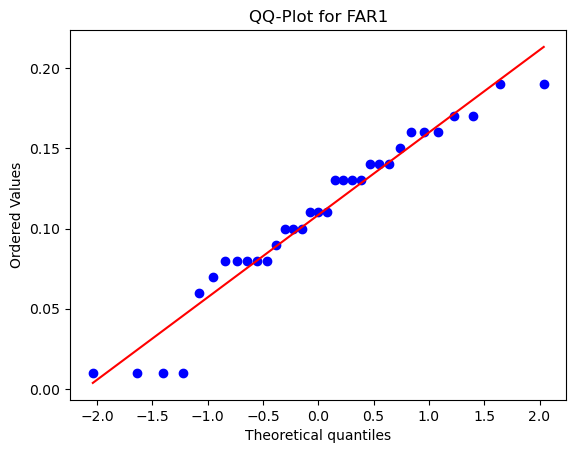

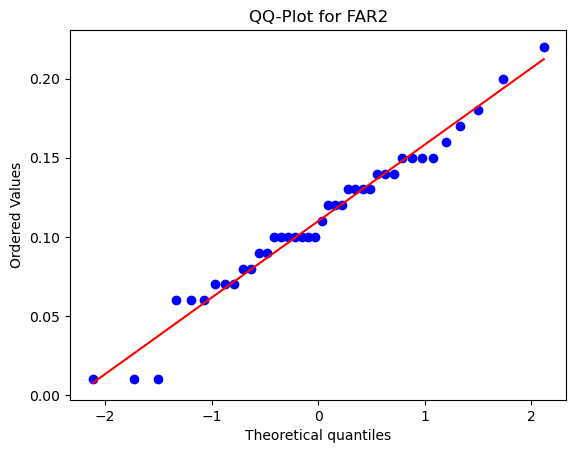

In [34]:
# QQ-plot 
for area, areas_data in far.groupby('Zona de Produção'):
    stats.probplot(areas_data['Pb (mg/kg)'], dist='norm',plot=plt,fit=True)
    plt.title(f'QQ-Plot for {area}')
    plt.show()

__Homogeneity of Variance__

In [35]:
# Levene Test
stat, p_value = stats.levene(*[group_data for _, group_data in groups])
alpha = 0.05
print(f"Levene's Test for Homogeneity of Variance - p-value: {p_value}")
if p_value > alpha:
    print("Homogeneity of Variance is met (fail to reject H0)")
else:
    print("Homogeneity of Variance is not met (reject H0)")

Levene's Test for Homogeneity of Variance - p-value: 0.6390812171129665
Homogeneity of Variance is met (fail to reject H0)


__Perform T-Test__

In [36]:
# Sample data for Group A and Group B (replace with your own data)
far1 = far[far['Zona de Produção']=='FAR1']['Pb (mg/kg)'].values
far2 = far[far['Zona de Produção']=='FAR2']['Pb (mg/kg)'].values

# Perform the two-sample t-test
t_statistic, p_value = stats.ttest_ind(far1, far2)

# Determine the significance level (alpha)
alpha = 0.05

# Compare the p-value with the significance level
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference between the means.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference between the means.")

Fail to reject the null hypothesis. There is no significant difference between the means.


Conclusions: By the T-test it is possible to see that all the FAR areas doesn´t have significant diferences in the [pb] mean. So we can group all the FAR areas into a single 'FAR' area.

## [Pb] POR

In [37]:
por = df[df['Zona de Produção'].str.contains('POR')]
por['Zona de Produção'].value_counts()

POR2    31
POR3     9
Name: Zona de Produção, dtype: int64

<AxesSubplot:xlabel='Zona de Produção', ylabel='Pb (mg/kg)'>

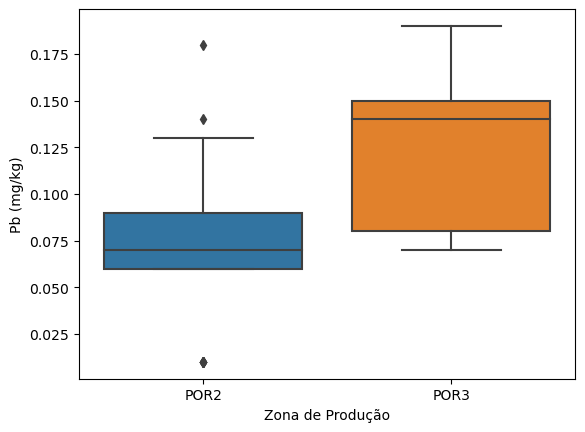

In [55]:
sns.boxplot(por['Zona de Produção'],por['Pb (mg/kg)'])

In [56]:
por.groupby('Zona de Produção').agg(N_Samples=('Zona de Produção','count'),
                                  Pb_mean=('Pb (mg/kg)','mean'))

,N_Samples,Pb_mean
Zona de Produção,,
POR2,31,0.071290
POR3,9,0.122222


__Normality__

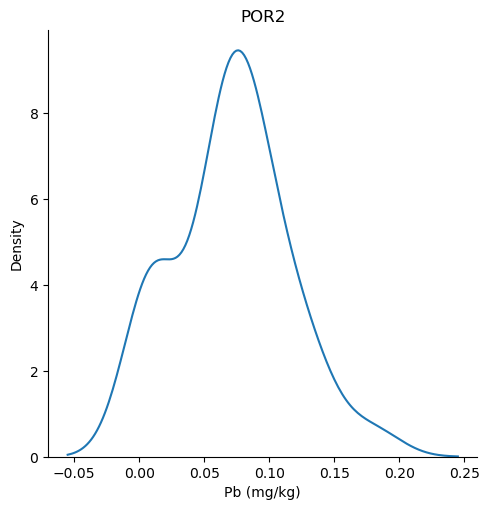

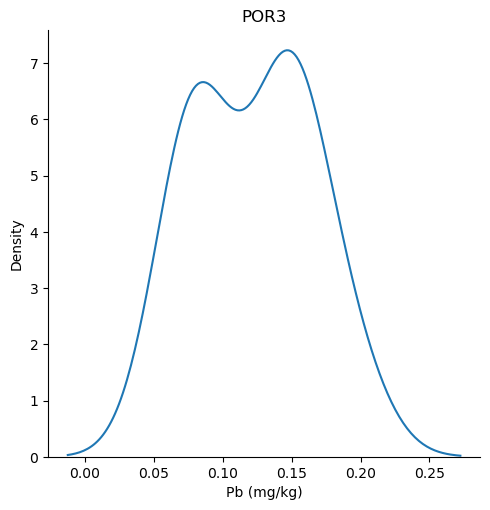

In [38]:
for areas, areas_data in por.groupby('Zona de Produção'):
    sns.displot(areas_data['Pb (mg/kg)'],kind='kde')
    plt.title(areas)

In [39]:
# Shapiro-Wilk Test
groups = por.groupby('Zona de Produção')['Pb (mg/kg)']

for group_name, group_data in groups:
    print(f"Group: {group_name}")
    shapiro_test(group_data)

Group: POR2
Shapiro-Wilk Test for Normality - p-value: 0.02939838171005249
Data is not normally distributed (reject H0)
Group: POR3
Shapiro-Wilk Test for Normality - p-value: 0.14239326119422913
Data is normally distributed (fail to reject H0)


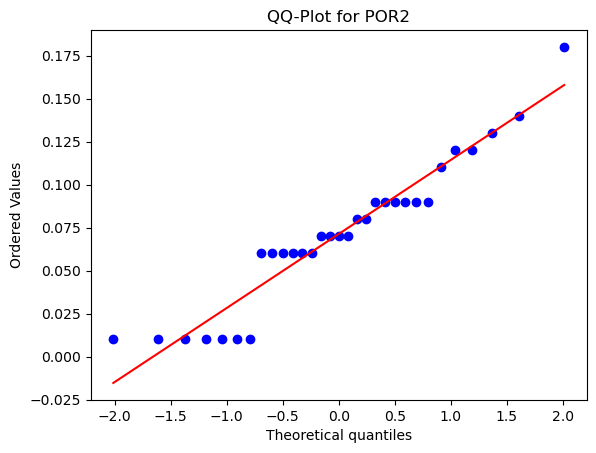

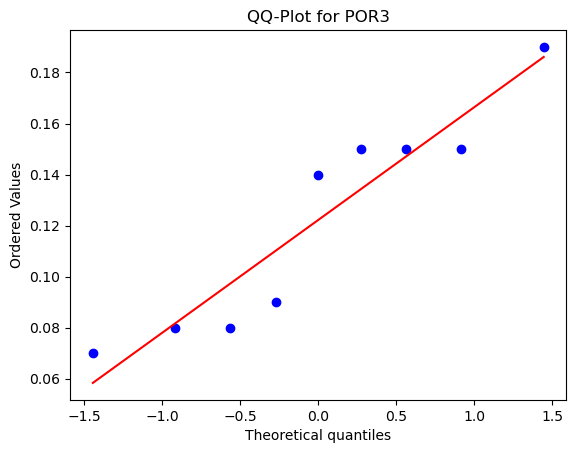

In [40]:
# QQ-plot 
for area, areas_data in por.groupby('Zona de Produção'):
    stats.probplot(areas_data['Pb (mg/kg)'], dist='norm',plot=plt,fit=True)
    plt.title(f'QQ-Plot for {area}')
    plt.show()

__Homogeneity of Variance__

In [41]:
# Levene Test
stat, p_value = stats.levene(*[group_data for _, group_data in groups])
alpha = 0.05
print(f"Levene's Test for Homogeneity of Variance - p-value: {p_value}")
if p_value > alpha:
    print("Homogeneity of Variance is met (fail to reject H0)")
else:
    print("Homogeneity of Variance is not met (reject H0)")

Levene's Test for Homogeneity of Variance - p-value: 0.7557777605322598
Homogeneity of Variance is met (fail to reject H0)


__Perform T-Test__

In [42]:
# Sample data for Group A and Group B (replace with your own data)
por3 = por[por['Zona de Produção']=='POR3']['Pb (mg/kg)'].values
por2 = por[por['Zona de Produção']=='POR2']['Pb (mg/kg)'].values

# Perform the two-sample t-test
t_statistic, p_value = stats.ttest_ind(por3, por2)

# Determine the significance level (alpha)
alpha = 0.05

# Compare the p-value with the significance level
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference between the means.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference between the means.")

Reject the null hypothesis. There is a significant difference between the means.


Conclusions: By the T-test it is possible to see that all the POR areas have significant diferences in the [pb] mean. However it is important to note that we are dealing with an high unbanlaced data and this data doesn´t met the anova assumptions.

## [Pb] L7

In [51]:
l7 = df[df['Zona de Produção'].str.contains('L7')]
l7['Zona de Produção'].value_counts()

L7c2    36
L7c1    19
L7a     15
L7b     14
Name: Zona de Produção, dtype: int64

<AxesSubplot:xlabel='Zona de Produção', ylabel='Pb (mg/kg)'>

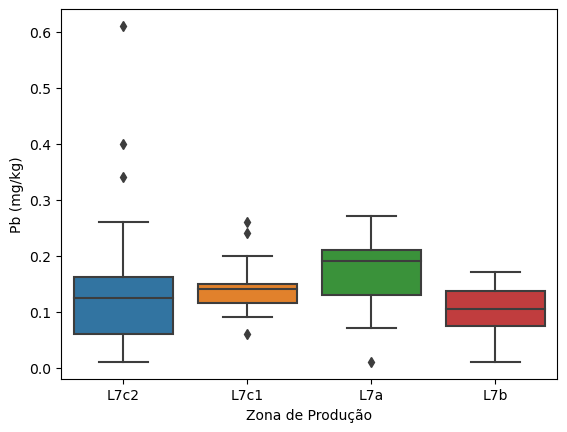

In [52]:
sns.boxplot(l7['Zona de Produção'],l7['Pb (mg/kg)'])

In [53]:
l7.groupby('Zona de Produção').agg(N_Samples=('Zona de Produção','count'),
                                  Pb_mean=('Pb (mg/kg)','mean'))

,N_Samples,Pb_mean
Zona de Produção,,
L7a,15,0.166000
L7b,14,0.102857
L7c1,19,0.141579
L7c2,36,0.134722


__Normality__

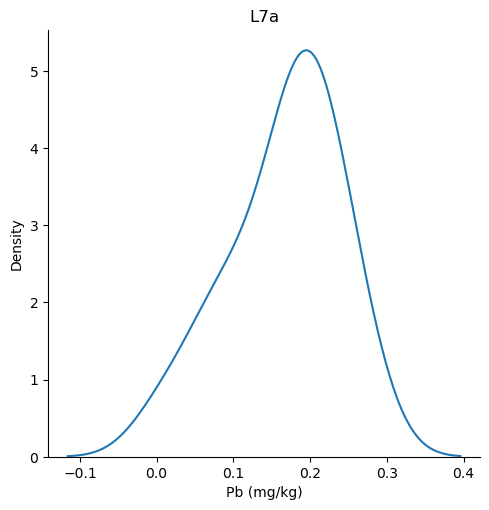

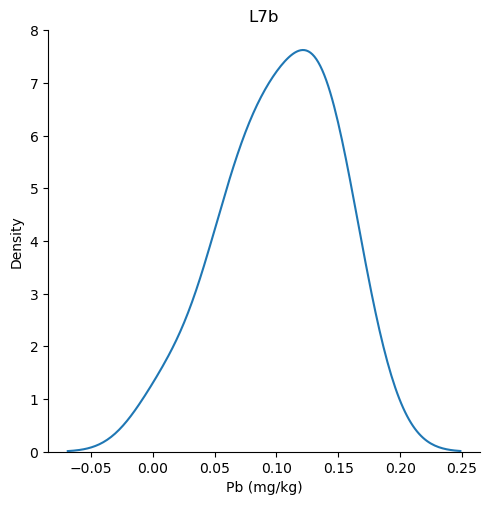

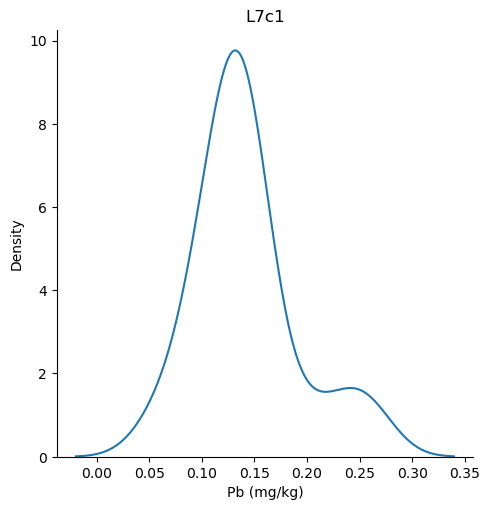

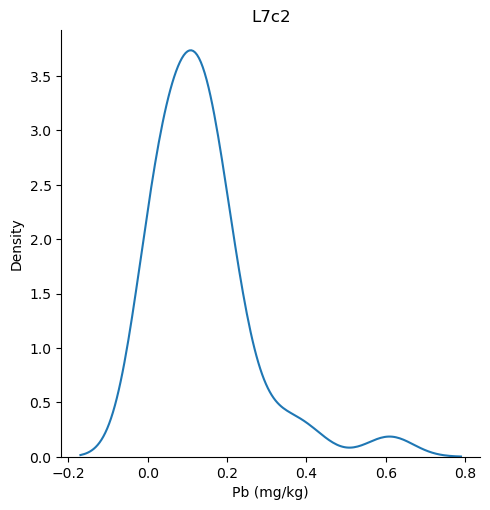

In [44]:
for areas, areas_data in l7.groupby('Zona de Produção'):
    sns.displot(areas_data['Pb (mg/kg)'],kind='kde')
    plt.title(areas)

In [45]:
# Shapiro-Wilk Test
groups = l7.groupby('Zona de Produção')['Pb (mg/kg)']

for group_name, group_data in groups:
    print(f"Group: {group_name}")
    shapiro_test(group_data)

Group: L7a
Shapiro-Wilk Test for Normality - p-value: 0.5341272354125977
Data is normally distributed (fail to reject H0)
Group: L7b
Shapiro-Wilk Test for Normality - p-value: 0.8329084515571594
Data is normally distributed (fail to reject H0)
Group: L7c1
Shapiro-Wilk Test for Normality - p-value: 0.022949861362576485
Data is not normally distributed (reject H0)
Group: L7c2
Shapiro-Wilk Test for Normality - p-value: 3.914450280717574e-05
Data is not normally distributed (reject H0)


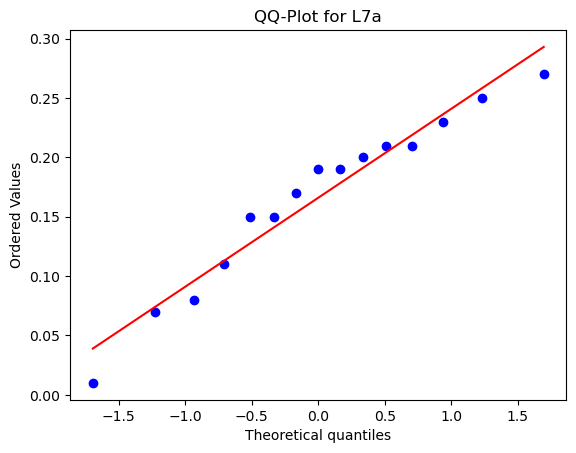

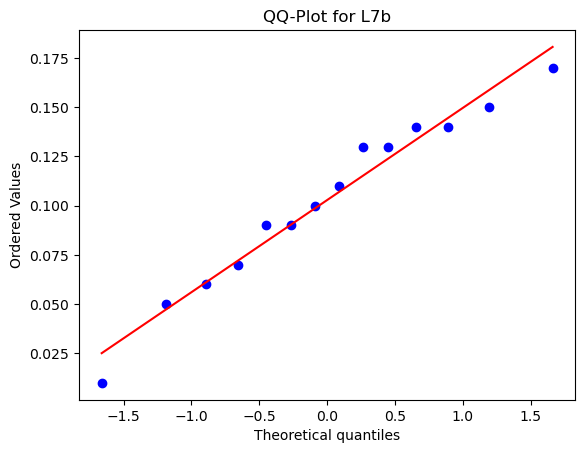

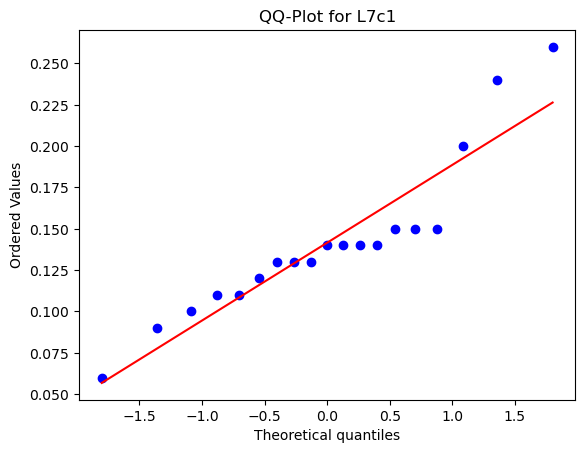

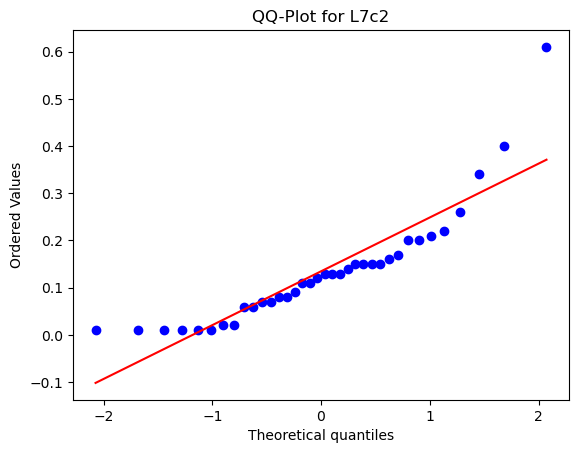

In [46]:
# QQ-plot 
for area, areas_data in l7.groupby('Zona de Produção'):
    stats.probplot(areas_data['Pb (mg/kg)'], dist='norm',plot=plt,fit=True)
    plt.title(f'QQ-Plot for {area}')
    plt.show()

__Homogeneity of Variance__

In [47]:
# Levene Test
stat, p_value = stats.levene(*[group_data for _, group_data in groups])
alpha = 0.05
print(f"Levene's Test for Homogeneity of Variance - p-value: {p_value}")
if p_value > alpha:
    print("Homogeneity of Variance is met (fail to reject H0)")
else:
    print("Homogeneity of Variance is not met (reject H0)")

Levene's Test for Homogeneity of Variance - p-value: 0.030905418700401612
Homogeneity of Variance is not met (reject H0)


__Perform One-Way Anova__

In [48]:
model = smf.ols('Q("Pb (mg/kg)") ~ Q("Zona de Produção")', data=l7).fit()
result = sm.stats.anova_lm(model)
print(result)

                         df    sum_sq   mean_sq         F    PR(>F)
Q("Zona de Produção")   3.0  0.029503  0.009834  1.179902  0.322701
Residual               80.0  0.666796  0.008335       NaN       NaN


Conclusions: By the One-Way Anova it is possible to see that all the L7 areas have no significant diferences in the [pb] mean. 